In [1]:
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN
import scipy
import scipy.stats
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt

import seaborn as sns
from random import randrange,uniform

C:\Users\admin\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
os.chdir("C:/Users/admin/akansha")

In [3]:
marketing_train=pd.read_csv("marketing_train.csv")

In [4]:
marketing_train.shape


(7414, 22)

In [5]:
marketing_train.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


In [5]:
print(marketing_train.dtypes)

custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail           int64
responded          object
dtype: object


In [6]:
marketing_train['schooling']=marketing_train['schooling'].replace("illiterate","unknown")
marketing_train['schooling']=marketing_train['schooling'].replace(["basic.4y","basic.6y","basic.9y","high.school","professional.course"],"high.school")
marketing_train['default']=marketing_train['default'].replace("yes","unknown")
marketing_train['marital']=marketing_train['marital'].replace("unknown","married")
marketing_train['month']=marketing_train['month'].replace(["sep","oct","mar","dec"],"dec")
marketing_train['month']=marketing_train['month'].replace(["aug","jul","jun","may","nov"],"jun")
marketing_train['loan']=marketing_train['month'].replace("unknown","no")
marketing_train['profession']=marketing_train['profession'].replace(["management","unknown","unemployed","admin"],"admin")
marketing_train['profession']=marketing_train['profession'].replace(["blue-collar","housemaid","services","self-employed","entrepreneur","technician"],"blue-collar")

In [7]:
marketing_train['schooling']

0       university.degree
1                     NaN
2             high.school
3                     NaN
4       university.degree
5             high.school
6                     NaN
7             high.school
8             high.school
9             high.school
10                    NaN
11            high.school
12      university.degree
13            high.school
14      university.degree
15                    NaN
16            high.school
17            high.school
18            high.school
19                    NaN
20      university.degree
21                    NaN
22      university.degree
23                    NaN
24            high.school
25                    NaN
26      university.degree
27      university.degree
28                    NaN
29                    NaN
              ...        
7384          high.school
7385          high.school
7386                  NaN
7387                  NaN
7388          high.school
7389    university.degree
7390                  NaN
7391        

In [12]:
missing_value=pd.DataFrame(marketing_train.isnull().sum())

In [13]:
missing_value

,0
custAge,1804
profession,0
marital,0
schooling,2155
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,711


In [14]:
missing_value=missing_value.reset_index()


In [15]:
missing_value=missing_value.rename(columns={'index':'variables',0:'missing_percentage'})

In [16]:
missing_value['missing_percentage']=(missing_value['missing_percentage']/len(marketing_train))*100

In [17]:
missing_value=missing_value.sort_values("missing_percentage",ascending=False).reset_index(drop=True)

In [14]:
missing_value

,variables,missing_percentage
0,schooling,29.066631
1,custAge,24.332344
2,day_of_week,9.589965
3,previous,0.000000
4,pastEmail,0.000000
5,pmonths,0.000000
6,nr.employed,0.000000
7,euribor3m,0.000000
8,cons.conf.idx,0.000000
9,cons.price.idx,0.000000


In [15]:
missing_value.to_csv("missing_percent.csv",index=False)

In [9]:
marketing_train


,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,1.0,2.0,1.0,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,1.0,-0.1,93.200,-42.0,4.191,5195.8,999.0,0.0,0.0
1,45.999748,2.0,1.0,-1.0,0.0,0.0,2.0,0.0,2.0,1.0,...,0.0,1.0,1.4,93.918,-42.7,4.960,5228.1,999.0,0.0,0.0
2,42.000000,2.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,...,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0,999.0,0.0,0.0
3,55.000000,0.0,0.0,-1.0,1.0,2.0,2.0,0.0,2.0,4.0,...,0.0,1.0,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,0.0
4,39.997470,1.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,3.0,...,1.0,0.0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1.0,0.0
5,47.000000,2.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0,0.0,...,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0,999.0,0.0,0.0
6,35.000000,2.0,2.0,-1.0,0.0,2.0,2.0,1.0,2.0,3.0,...,0.0,1.0,1.1,93.994,-36.4,4.856,5191.0,999.0,0.0,1.0
7,39.000000,2.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0,4.0,...,0.0,1.0,1.1,93.994,-36.4,4.856,5191.0,999.0,0.0,0.0
8,28.000000,0.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,0.0,1.0,-1.8,92.893,-46.2,1.313,5099.1,999.0,0.0,0.0
9,46.000000,2.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,...,1.0,0.0,-0.1,93.200,-42.0,4.191,5195.8,999.0,0.0,0.0


In [11]:
# visualisations
from ggplot import *

C:\Users\admin\Anaconda\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


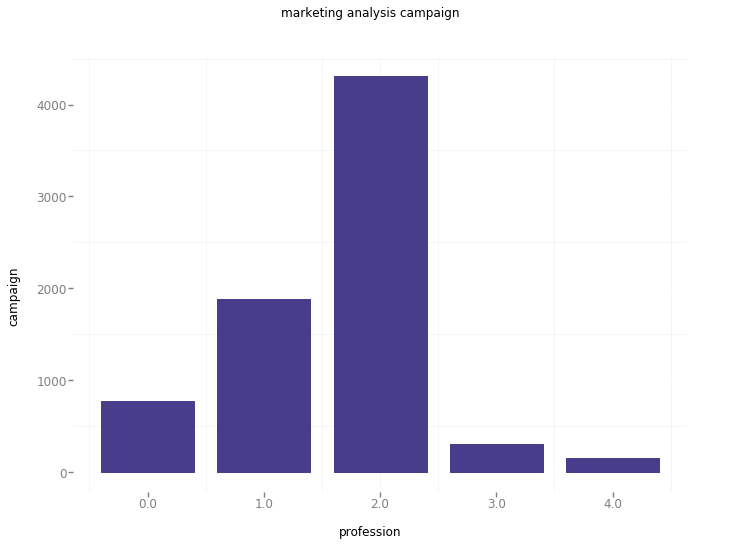

<ggplot: (-9223371906757232696)>

In [13]:
#barplot
ggplot(marketing_train,aes(x="profession",y="campaign"))+\
geom_bar(fill="DarkslateBlue")+\
scale_color_brewer(type='diverging',palette=4)+\
xlab("profession")+ylab("campaign")+\
ggtitle("marketing analysis campaign")+theme_bw()

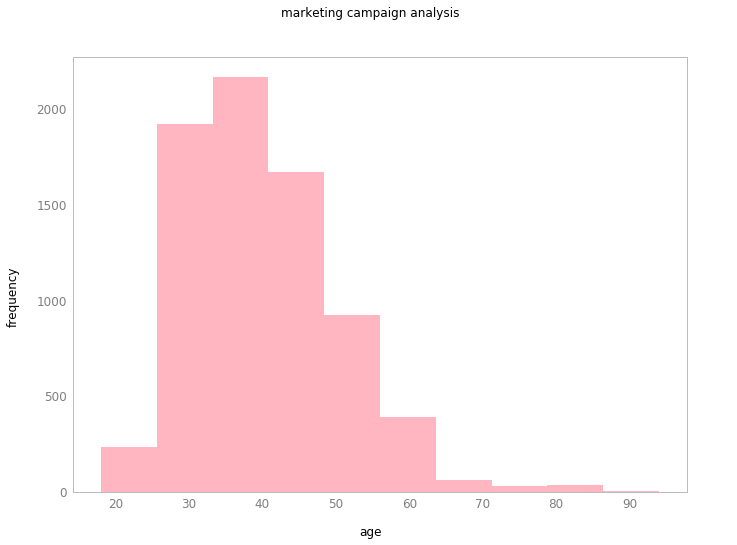

<ggplot: (-9223371906757232780)>

In [21]:
##histogram
ggplot(marketing_train,aes(x='custAge'))+\
geom_histogram(fill='lightpink',colour="black")+\
geom_density()+\
theme_bw()+xlab("age")+ylab("frequency")+\
ggtitle("marketing campaign analysis")+\
theme(text=element_text(size=20))

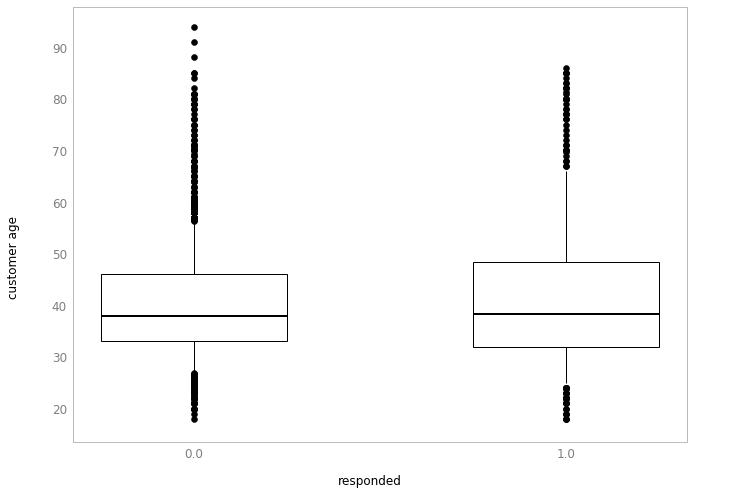

<ggplot: (130098081207)>

In [24]:
#boxplot
ggplot(marketing_train,aes(x='responded',y="custAge",fill="responded"))+\
geom_boxplot(fill="responded")+theme_bw()+\
xlab("responded")+ylab("customer age")+\
theme(text=element_text(size=30))



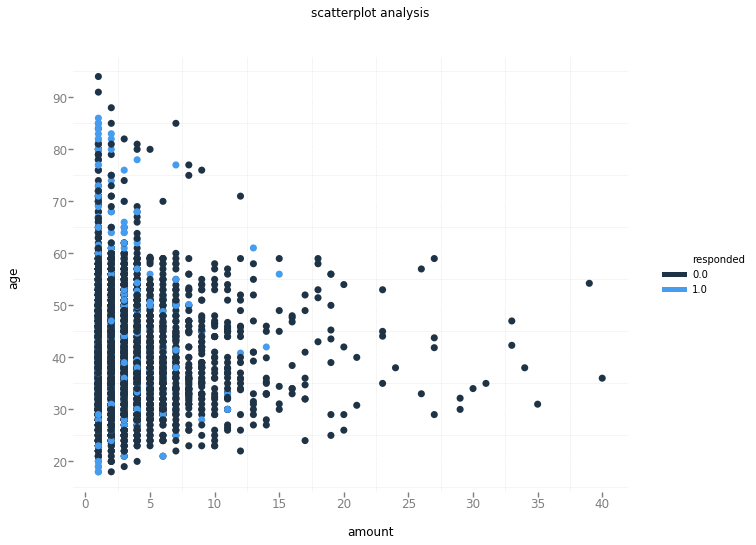

<ggplot: (130100073813)>

In [28]:
#multivariate scatter plot
ggplot(marketing_train,aes(x='campaign',y="custAge",colour='responded'))+\
geom_point(alpha=1,size=50)+theme_bw()+\
ylab("age")+xlab("amount")+\
ggtitle("scatterplot analysis")